<table align="left" width=200%>
    <tr>
        <td width="20%">
            <img src="banner.png">
        </td>
        <td>
            <div align="left">
                <font color="#21618C" size=8px>
                  <b> Customer Churn Analysis <br> (Team 7) </b> 
                </font>
            </div>
        </td>
    </tr>
</table>


## Table of Contents

1. **[Problem Statement](#problem)**
2. **[Data Dictionary](#dictionary)**
3. **[Import Libraries](#import_lib)**
4. **[Exploratory Data Analysis](#data_preparation)**
    - 4.1 - [Data Dimension](#Data_Shape)
    - 4.2 - [Data Types](#Data_Types)
    - 4.3 - [Summary Statistics](#Summary_Statistics)
    - 4.4 - [Correlation](#correlation)
    - 4.5 - [Data Distribution](#dist)
        - 4.5.1 - [Data Distribution(Features)](#dist_feature)
        - 4.5.2 - [Data Distribution(Target)](#dist_target)
 
5. **[Data Pre-Processing](#data_pre)**
    - 5.1 - [Missing Values](#Missing_Values)
        - 5.1.1 - [Standard Missing Values](#S_Missing_Values)
        - 5.1.2 - [Non-Standard Missing Values](#NS_Missing_Values)
        - 5.1.3 - [Missing values imputation](#impute)
    - 5.2 - [Duplicate Data](#duplicate)
    - 5.3 - [Feature Engineering](#feature_eng)
    - 5.4 - [Outliers](#out)
        - 5.4.1 - [Discovery of Outliers](#dis_out)
        - 5.4.2 - [Visualizing outliers using Boxplots](#viz)
        - 5.4.3 - [Removal of Outliers](#rem_out)
      
    - 5.5 - [Categorical Data Encoding](#cat_enc)
    - 5.6 - [Feature Scaling](#fea_sca)
6. **[Model Evaluation](#eval)**
    - 6.1 - [Feature Selection using Random Forest](#fea_sel)
    - 6.2 - [Grid Search CV](#grid)
    - 6.3 - [Kfold Cross Validation](#kfold)
    - 6.4 - [Defining Functions](#fun)
        - 6.4.1 - [Confusion Matrix](#matrix)
        - 6.4.2 - [ROC Curve](#roc)
        - 6.4.3 - [Classification Report](#report)
        - 6.4.4 - [Accuracy](#accuracy)
        - 6.4.5 - [F1 Score](#f1)
          
    
7. **[Model Building](#bui_mod)**
    - 7.1 - [Logistic Regression](#logreg)
    - 7.2 - [Naive Bayes](#bayes)
    - 7.3 - [K nearest neighbors (KNN)](#knn)
    - 7.4 - [Random Forest](#forest)
    - 7.5 - [AdaBoost](#adaboost)
    - 7.6 - [XGBoost](#xgboost)
    
  
8. **[Model Performance](#mod_per)**

9. **[Model Optimization](#mod_opt)**
    - 9.1 - [Block Diagram](#block)
    - 9.2 - [Voting Classifier](#vote)
    - 9.3 - [Stacking Classifier](#stack)
   
   


10. **[Displaying Score Summary](#dis_sco_sum)**

# 1. Problem Statement <a id='problem'></a>

**Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period.**<br>
Understanding and detecting churn is the first step to retaining these customers and improving the company’s offerings. 

**Our Goal** is to predict the churn for a website based on the features provided in the dataset. Customer will **EXIT(1) or NOT(0).**

# 2. Data Dictionary <a id='dictionary'></a>

1. **age**  Represents the age of a customer
2. **gender** Represents the gender of a customer
3. **security_no** 	Represents a unique security number that is used to identify a person
4. **region_category** 	Represents the region that a customer belongs to 
5. **membership_category** 	Represents the category of the membership that a customer is using
6. **joining_date** 	Represents the date when a customer became a member 
7. **joined_through_referral** 	Represents whether a customer joined using any referral code or ID
8. **referral_id 	Represents** a referral ID
9. **preferred_offer_types** 	Represents the type of offer that a customer prefers
10. **medium_of_operation** 	Represents the medium of operation that a customer uses for transactions
11. **internet_option** 	Represents the type of internet service a customer uses
12. **last_visit_time** 	Represents the last time a customer visited the website
13. **days_since_last_login** 	Represents the no. of days since a customer last logged into the website
14. **avg_time_spent** 	Represents the average time spent by a customer on the website
15. **avg_transaction_value** 	Represents the average transaction value of a customer
16. **avg_frequency_login_days** 	Represents the no. of times a customer has logged in to the website
17. **points_in_wallet** 	Represents the points awarded to a customer on each transaction 
18. **used_special_discount** 	Represents whether a customer uses special discounts offered
19. **offer_application_preference** 	Represents whether a customer prefers offers 
20. **past_complaint** 	Represents whether a customer has raised any complaints 
21. **complaint_status** 	Represents whether the complaints raised by a customer was resolved 
22. **feedback** 	Represents the feedback provided by a customer
23. **churn_risk_score** 0 or 1 [Customer will Stay or Exit]

# 3. Import Libraries <a id='import_lib'></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import *
from sklearn import tree

plt.rcParams['figure.figsize'] = [15,8]


import warnings
warnings.filterwarnings('ignore')

# 4. Exploratory Data Analysis  <a id='data_preparation'></a>

In [2]:
data = pd.read_csv('churn.csv', index_col=0)

In [3]:
data.head()

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1


In [4]:
data.tail()

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
36987,46,F,6F51HFO,NaN,Basic Membership,2017-09-21,No,xxxxxxxx,Credit/Debit Card Offers,Desktop,Wi-Fi,04:14:05,2,-650.682759,27277.68,6.0,639.510000,No,Yes,Yes,No Information Available,No reason specified,1
36988,29,F,21KSM8Y,Town,Basic Membership,2016-06-27,No,xxxxxxxx,Without Offers,Smartphone,Wi-Fi,23:18:31,13,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,1
36989,23,F,XK1IM9H,NaN,Basic Membership,2016-09-11,Yes,CID3838,Gift Vouchers/Coupons,Desktop,Wi-Fi,03:50:25,12,154.940000,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,1
36990,53,M,K6VTP1Z,Village,Platinum Membership,2017-06-15,No,xxxxxxxx,Gift Vouchers/Coupons,Smartphone,Mobile_Data,09:50:03,15,482.610000,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,0
36991,35,M,LBX0GLR,Town,Silver Membership,2015-10-23,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Mobile_Data,01:39:52,15,79.180000,2189.68,Error,719.970000,Yes,No,No,Not Applicable,Quality Customer Care,0


## 4.1 Data Dimensions <a id='Data_Shape'></a>

In [5]:
print(f'There are {data.shape[0]} data points and {data.shape[1]} features in the dataset')

There are 36992 data points and 23 features in the dataset


## 4.2 Data Types <a id='Data_Types'></a>

In [6]:
data.dtypes

age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
dtype: object

In [7]:
data.select_dtypes(include=[np.number])

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
0,18,17,300.630000,53005.25,781.750000,0
1,32,16,306.340000,12838.38,NaN,0
2,44,14,516.160000,21027.00,500.690000,1
3,37,11,53.270000,25239.56,567.660000,1
4,31,20,113.130000,24483.66,663.060000,1
...,...,...,...,...,...,...
36987,46,2,-650.682759,27277.68,639.510000,1
36988,29,13,-638.123421,11069.71,527.990000,1
36989,23,12,154.940000,38127.56,680.470000,1
36990,53,15,482.610000,2378.86,197.264414,0


In [8]:
data.select_dtypes(include=['object']).head()

,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,avg_frequency_login_days,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17.0,Yes,Yes,No,Not Applicable,Products always in Stock
1,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,10.0,Yes,No,Yes,Solved,Quality Customer Care
2,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,22.0,No,Yes,Yes,Solved in Follow-up,Poor Website
3,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,6.0,No,Yes,Yes,Unsolved,Poor Website
4,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,16.0,No,Yes,Yes,Solved,Poor Website


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                      There are 17 categorical variables and 6 numerical variables.
                     </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## 4.3 Summary Statistics <a id='Summary_Statistics'></a>

In [9]:
data.describe(include=np.number)

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,0.540982
std,15.867412,228.819900,398.289149,19444.806226,194.063624,0.498324
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,0.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,0.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,1.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,1.000000


In [10]:
data.describe(include='object')

,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,avg_frequency_login_days,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,36992,36992,31564,36992,36992,36992,36992,36704,36992,36992,36992,36992,36992,36992,36992,36992,36992
unique,3,36992,3,6,1096,3,11359,3,4,3,30101,1654,2,2,2,5,9
top,F,5W00I22,Town,Basic Membership,2015-06-02,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,07:56:41,Error,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,18490,1,14128,7724,55,15839,17846,12349,13913,12413,6,3522,20342,20440,18602,18602,6350


## 4.4 Correlation <a id='correlation'></a> 

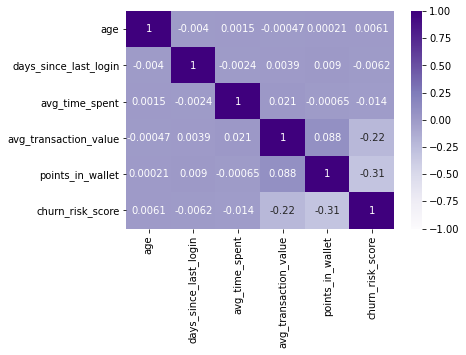

In [11]:
sns.heatmap(data.corr(), vmax=1, vmin=-1,cmap='Purples', annot=True)
plt.show()

## 4.5 Data Distribution <a id='dist'></a>

### 4.5.1 Data Distribution of Features <a id='dist_feature'></a>

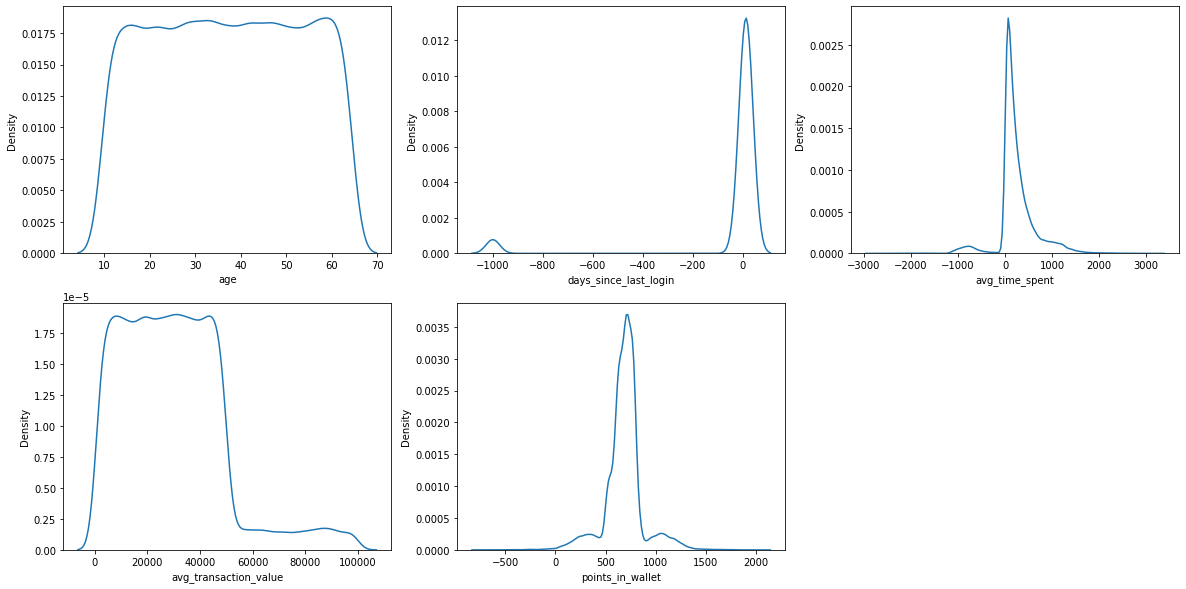

In [12]:
data_num=data.drop('churn_risk_score', axis=1).select_dtypes(include=[np.number]) 
fig,ax= plt.subplots(nrows=2,ncols=3,figsize=(20,10)) 
for variable, subplot in zip(data_num.columns,ax.flatten()):
    z = sns.kdeplot(x = data_num[variable] , ax=subplot) 
    z.set_xlabel(variable, fontsize = 10)

fig.delaxes(ax[1][2])
plt.show()

In [13]:
data_num.skew()

age                     -0.007319
days_since_last_login   -3.941356
avg_time_spent           0.539624
avg_transaction_value    1.011027
points_in_wallet        -0.080309
dtype: float64

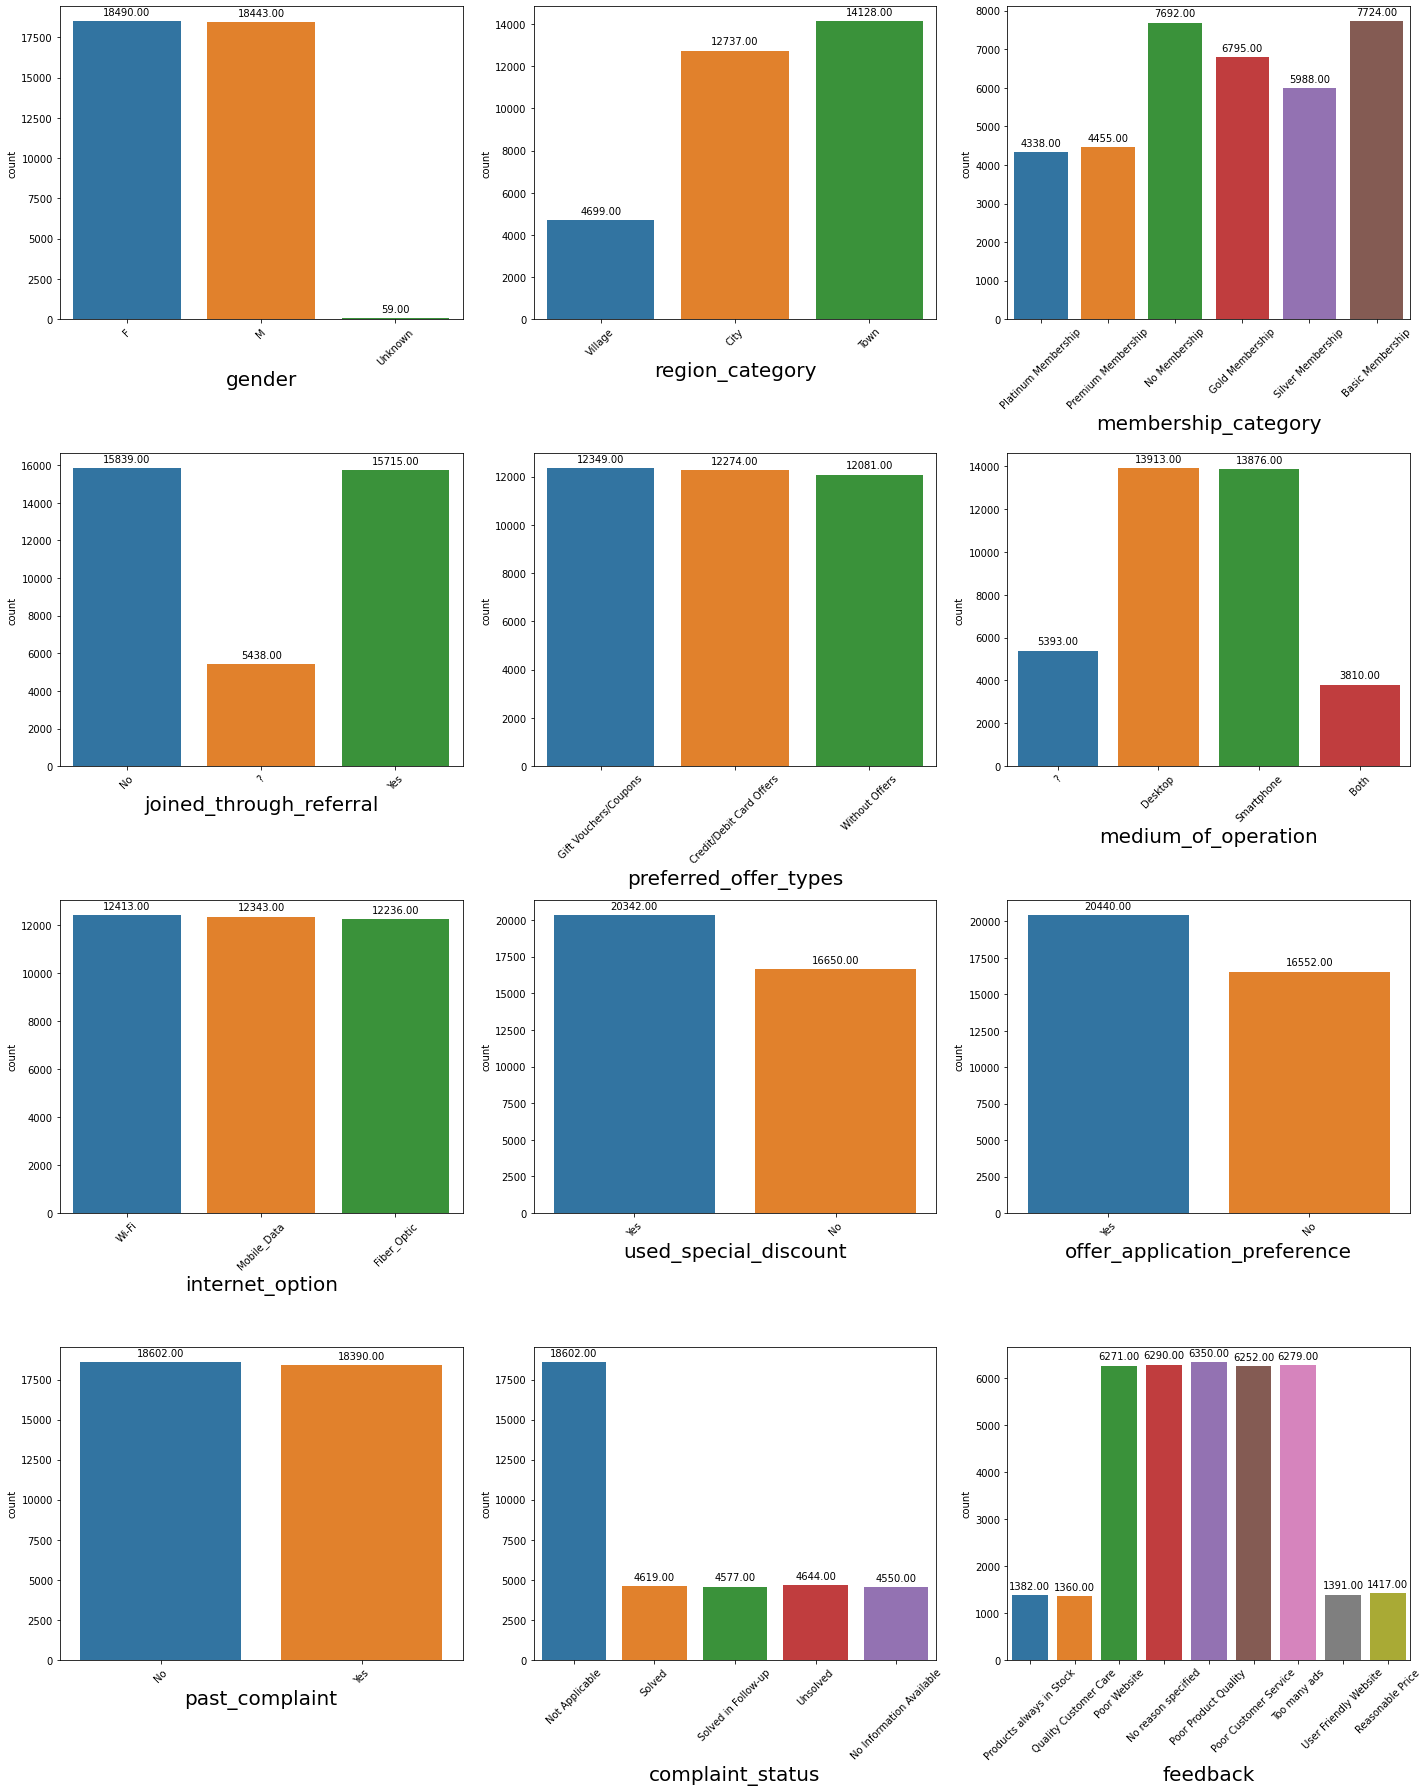

In [14]:
data_cat = data.drop(['referral_id','last_visit_time','avg_frequency_login_days','security_no','joining_date'], axis=1).select_dtypes(include='object')
fig,ax= plt.subplots(nrows=4,ncols=3,figsize=(20, 25)) 
for variable, subplot in zip(data_cat.columns,ax.flatten()):
    z = sns.countplot(x = data_cat[variable],ax=subplot, ) 
    z.set_xlabel(variable, fontsize = 20)
    z.set_xticklabels(z.get_xticklabels(),rotation=45)
    for p in z.patches:
      z.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 6), textcoords = 'offset points')
    
plt.tight_layout()

### 4.5.2 Data Distribution of Target <a id='dist_target'></a>

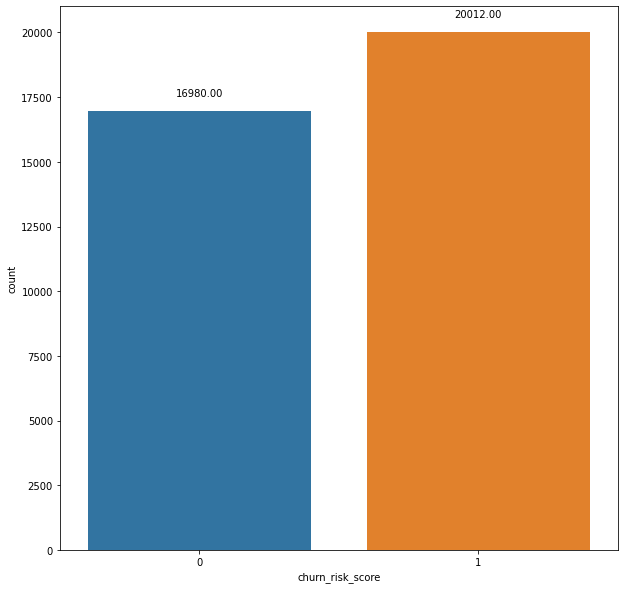

In [15]:
plt.rcParams['figure.figsize'] = [10,10] 
ax = sns.countplot(data['churn_risk_score'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2. , p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')
plt.show() 

# 5. Data Preprocessing   <a id='data_pre'></a>

## 5.1 Missing values <a id='Missing_Values'></a>

### 5.1.1 Standard Missing Values  <a id='S_Missing_Values'></a>

In [16]:
missing_values = pd.DataFrame({
    'missing_values':data.isnull().sum(),
    'percentage':data.isnull().sum()*100/data.shape[0]
})

missing_values.sort_values(by='missing_values', ascending=False)

,missing_values,percentage
region_category,5428,14.673443
points_in_wallet,3443,9.307418
preferred_offer_types,288,0.778547
age,0,0.000000
avg_time_spent,0,0.000000
feedback,0,0.000000
complaint_status,0,0.000000
past_complaint,0,0.000000
offer_application_preference,0,0.000000
used_special_discount,0,0.000000


### 5.1.2 Non-Standard Missing Values <a id='NS_Missing_Values'></a>

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
The non-standard missing values are replaced with NaN                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
data.joined_through_referral.value_counts()

No     15839
Yes    15715
?       5438
Name: joined_through_referral, dtype: int64

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                      The feature joined_through_referral has unindentified '?' values which are replaced with Nan.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>



In [18]:
data['joined_through_referral'] = data['joined_through_referral'].replace('?',np.NaN)

In [19]:
data.gender.value_counts()

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                        The feature gender has unindentified 'Unknown' values which are replaced with Nan. 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
data['gender'] = data['gender'].replace('Unknown',np.NaN)

In [21]:
data.referral_id.unique()

array(['xxxxxxxx', 'CID21329', 'CID12313', ..., 'CID60808', 'CID10431',
       'CID45477'], dtype=object)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                        The feature referral_id has unindentified 'xxxxxxxx' values which are replaced with Nan.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
data['referral_id'] = data['referral_id'].replace('xxxxxxxx',np.NaN)  

In [23]:
data.medium_of_operation.value_counts()

Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: medium_of_operation, dtype: int64

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>    
The feature medium_of_operation has unindentified '?' values which are replaced with Nan. 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
data['medium_of_operation'] = data['medium_of_operation'].replace('?',np.NaN)  

In [25]:
len(data[data.days_since_last_login < 0]['days_since_last_login'])

1999

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                        The feature days_since_last_login has unindentified '-999' values which are replaced with Nan. 
                   </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
data['days_since_last_login'] = data['days_since_last_login'].replace(-999,np.NaN)  

In [27]:
len(data[data.avg_time_spent < 0]['avg_time_spent'])

1719

In [28]:
data['avg_time_spent']=data['avg_time_spent'].apply(lambda x:x if x>=0 else np.nan)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                        The feature avg_time_spent has negative values which are replaced with Nan
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
len(data[data.points_in_wallet < 0]['points_in_wallet'])

136

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                        The feature points_in_wallet has negative values which are replaced with Nan
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
data['points_in_wallet']=data['points_in_wallet'].apply(lambda x:x if x>=0 else np.nan)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                        The feature avg_frequency_login_days has negative values as well as unidentified 'Error' values which are replaced with Nan
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
data['avg_frequency_login_days']=data['avg_frequency_login_days'].apply(lambda x:x if x!='Error' else -1)

In [32]:
data['avg_frequency_login_days']=data['avg_frequency_login_days'].astype('float')

In [33]:
data['avg_frequency_login_days']=data['avg_frequency_login_days'].apply(lambda x:x if x>=0 else np.nan)

In [34]:
missing_values = pd.DataFrame({
    'missing_values':data.isnull().sum(),
    'percentage':data.isnull().sum()*100/data.shape[0]
})

missing_values.sort_values(by='missing_values', ascending=False)

,missing_values,percentage
referral_id,17846,48.242863
joined_through_referral,5438,14.700476
region_category,5428,14.673443
medium_of_operation,5393,14.578828
avg_frequency_login_days,4205,11.367323
points_in_wallet,3579,9.675065
days_since_last_login,1999,5.403871
avg_time_spent,1719,4.646951
preferred_offer_types,288,0.778547
gender,59,0.159494


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                        There are 10 features that has missing values.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

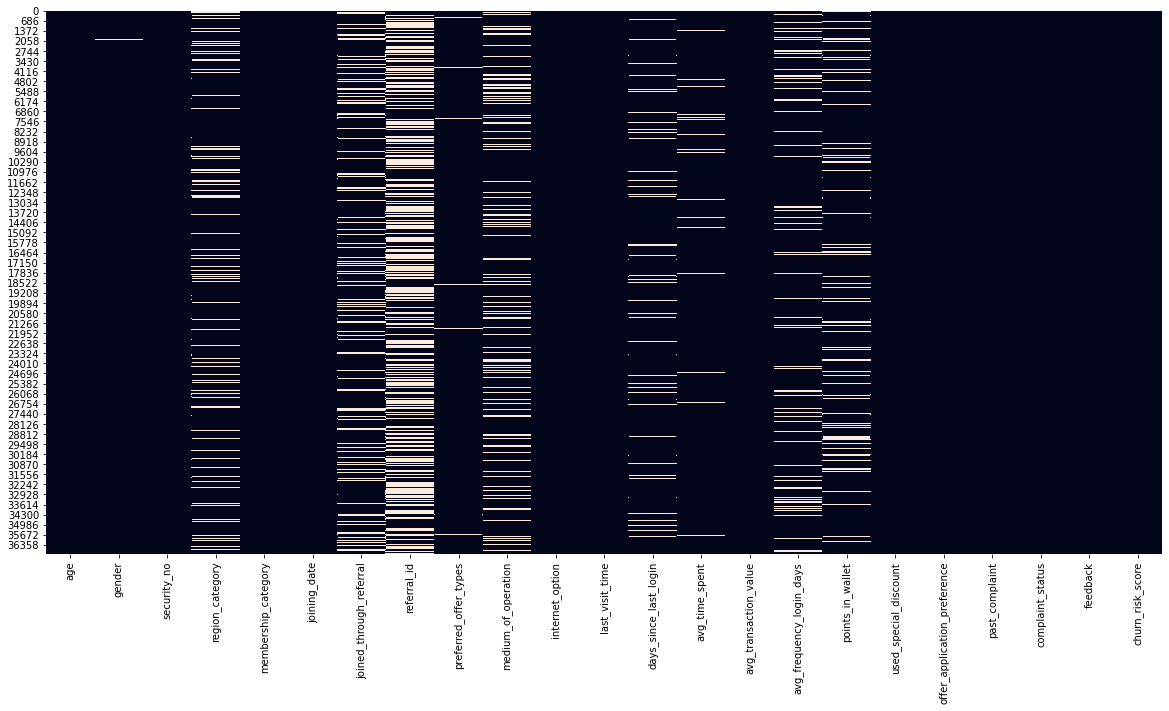

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

###  5.1.3 Missing values imputation <a id='impute'></a>

In [36]:
df_num = data.select_dtypes(include=np.number)
df_cat = data.select_dtypes(include='object')

**Missing values treatment for categorical variable**

In [37]:
Missing_cat = data[['gender','preferred_offer_types','region_category','joined_through_referral','medium_of_operation']]
for i,col in enumerate(Missing_cat):
    data[col].fillna(data[col].mode()[0], inplace=True)

In [38]:
Missing_num = data[['points_in_wallet','avg_time_spent','days_since_last_login','avg_frequency_login_days']]

**Missing values treatment for numerical variable**

In [39]:
imputer = KNNImputer(n_neighbors=3)
imputed_value=imputer.fit_transform(Missing_num)

In [40]:
d1 = pd.DataFrame({
    'avg_frequency_login_days':imputed_value.T[0],
    'points_in_wallet':imputed_value.T[1],
    'days_since_last_login':imputed_value.T[2],
    'avg_time_spent':imputed_value.T[3]

})

data.drop(['avg_frequency_login_days','points_in_wallet','days_since_last_login','avg_time_spent'], axis=1, inplace=True)

data = pd.concat([data, d1], axis=1)

### 5.2 Duplicate Data  <a id='duplicate'></a>

In [41]:
data[data.duplicated()]

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,avg_transaction_value,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,avg_frequency_login_days,points_in_wallet,days_since_last_login,avg_time_spent


## 5.3 Feature Engineering  <a id='feature_eng'></a>

In [42]:
data['year']=data.joining_date.apply(lambda x:2021-int(x.split('-')[0]))

In [43]:
data.drop(['security_no','joining_date','referral_id','last_visit_time'], axis=1, inplace=True)

## 5.4 Outliers <a id='out'></a>

### 5.4.1 Discovery of Outliers <a id='dis_out'></a>

In [44]:
df_num=data.select_dtypes(include=[np.number]) 

In [45]:
Q1 = data.quantile(0.25) 
Q3 = data.quantile(0.75) 
IQR = Q3 - Q1 

In [46]:
outlier = pd.DataFrame((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR)))
for i in outlier.columns:
    print(f'Total number of Outliers in column {i} are {len(outlier[outlier[i] == True][i])}')

Total number of Outliers in column age are 0
Total number of Outliers in column avg_transaction_value are 1131
Total number of Outliers in column churn_risk_score are 0
Total number of Outliers in column avg_frequency_login_days are 4419
Total number of Outliers in column points_in_wallet are 2911
Total number of Outliers in column days_since_last_login are 0
Total number of Outliers in column avg_time_spent are 417
Total number of Outliers in column year are 0


### 5.4.2 Visualizing outliers using Boxplots <a id='viz'></a>

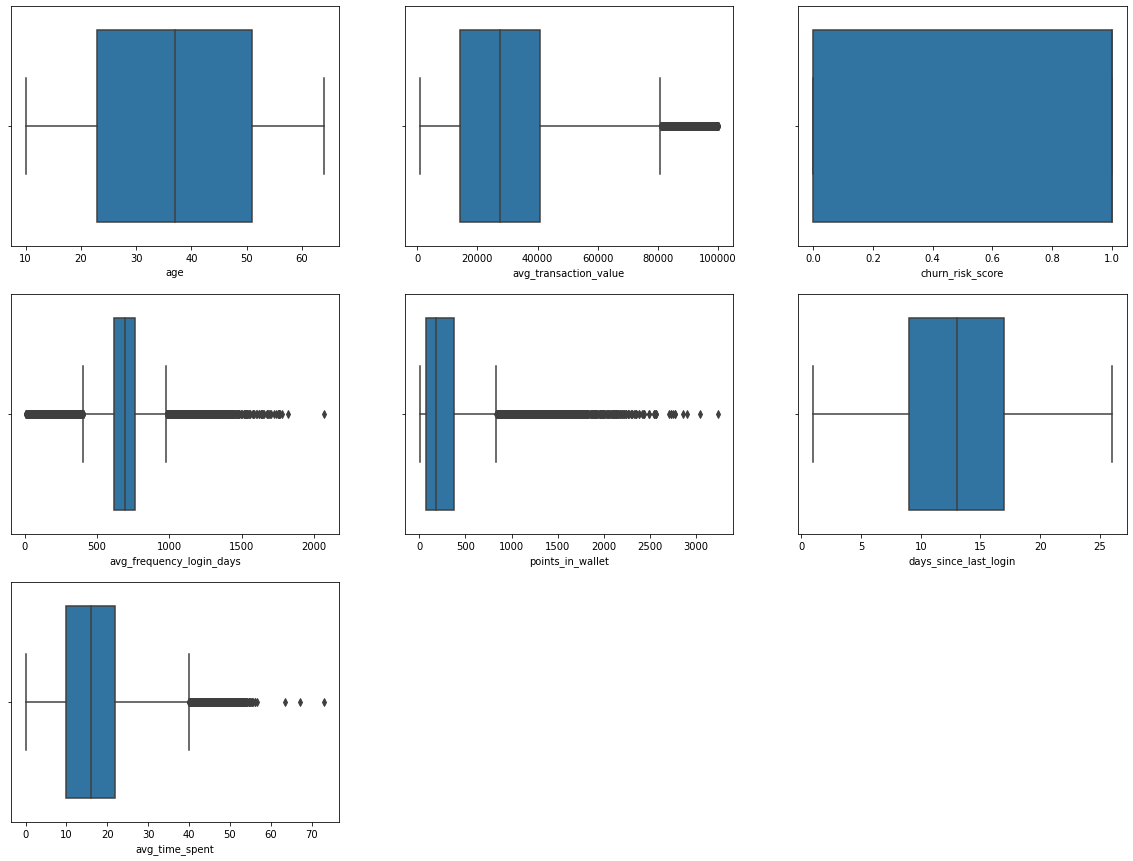

In [47]:
fig,ax= plt.subplots(nrows=3,ncols=3,figsize=(20, 15)) 
for variable, subplot in zip(df_num.columns,ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot) 
    z.set_xlabel(variable, fontsize = 10)
    
fig.delaxes(ax[2][1])
fig.delaxes(ax[2][2])
plt.show()

### 5.4.3 Removal of Outliers <a id='rem_out'></a>

In [48]:
data_iqr = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)] 

data_iqr.reset_index(inplace=True)

data_iqr.drop('index',axis=1, inplace=True)

In [49]:
df_cat = data_iqr[['gender','region_category','joined_through_referral','preferred_offer_types','medium_of_operation','internet_option','used_special_discount','offer_application_preference','past_complaint']]
df_num = data_iqr.select_dtypes(include=np.number)

## 5.5 Categorical Data Encoding  <a id='cat_enc'></a>

In [50]:
orderencoding_membership_category = OrdinalEncoder(categories = [["No Membership", "Basic Membership", "Silver Membership", "Gold Membership","Platinum Membership","Premium Membership"]])
data_iqr['membership_category'] = orderencoding_membership_category.fit_transform(data_iqr['membership_category'].values.reshape(-1,1))

orderencoding_complaint_status = OrdinalEncoder(categories = [["No Information Available", "Not Applicable", "Unsolved","Solved","Solved in Follow-up"]])
data_iqr['complaint_status'] = orderencoding_complaint_status.fit_transform(data_iqr['complaint_status'].values.reshape(-1,1)) 

labelencoder_feedback = LabelEncoder() 
data_iqr['feedback'] = labelencoder_feedback.fit_transform(data_iqr.feedback) 

df_categorical = pd.get_dummies(df_cat, drop_first=True)

In [51]:
df_final = pd.concat([df_categorical,df_num,data_iqr['membership_category'],data_iqr['complaint_status'],data_iqr['feedback']], axis=1)

## 5.6 Feature Scaling  <a id='fea_sca'></a>

In [52]:
col = df_final[['age','days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet']]

In [53]:
df_final.drop(['age','days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet'], axis=1, inplace=True)

In [54]:
standard_scale = StandardScaler() 
col1 = standard_scale.fit_transform(col) 
df_scaled = pd.DataFrame(col1, columns=col.columns)

In [55]:
df_scaled.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
0,-1.208984,0.756534,0.098413,1.566061,1.034098,0.434489
1,-0.326122,0.573779,-0.849656,-0.882798,0.914516,0.464924
2,0.430618,0.208270,0.775605,-0.383561,-1.995631,1.583281
3,-0.010814,-0.339995,-1.391410,-0.126733,-1.273718,-0.883959
4,-0.389183,1.304799,-0.037026,-0.172818,-0.245339,-0.564901


In [56]:
data_final = pd.concat([df_final,df_scaled], axis=1 )

# 6 Model Evaluation <a id='eval'></a> 

## 6.1 Feature Selection using Random Forest  <a id='fea_sel'></a> 

In [57]:
Features = data_final.drop(['churn_risk_score'] ,axis = 1)
Target = data_final['churn_risk_score']

In [58]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(Features, Target, test_size=0.20, random_state=42)

In [59]:
model =  RandomForestClassifier(random_state = 0)
model.fit(X_train1, y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

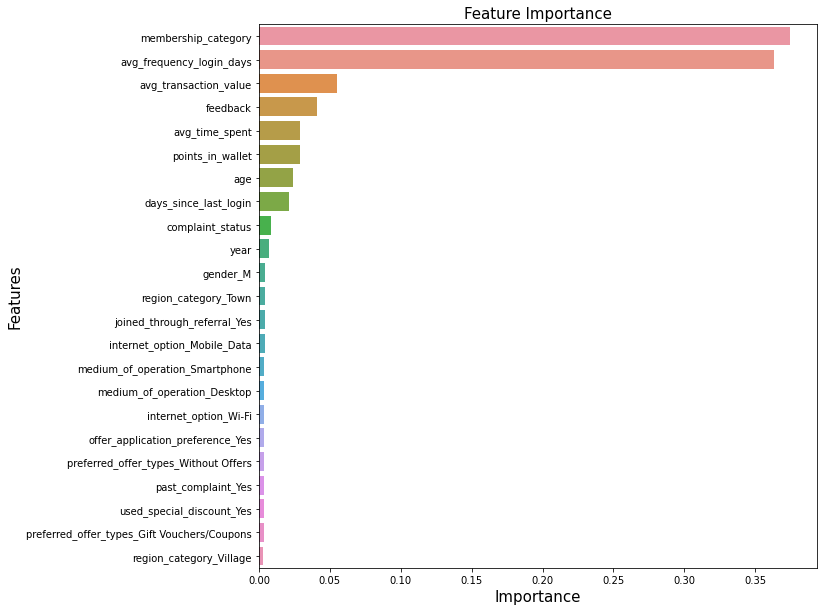

In [60]:
important_features = pd.DataFrame({'Features': X_train1.columns, 
                                   'Importance': model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                      Important features are identified using Random Forest and dropping inconsistent features.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [61]:
X = Features.drop(['region_category_Village',
                       'offer_application_preference_Yes',
                       'used_special_discount_Yes',
                       'preferred_offer_types_Gift Vouchers/Coupons',
                       'past_complaint_Yes',
                       'preferred_offer_types_Without Offers',
                       'medium_of_operation_Smartphone',
                       'medium_of_operation_Desktop',
                       'internet_option_Wi-Fi',
                       'internet_option_Mobile_Data',
                       'joined_through_referral_Yes',
                       'region_category_Town',
                      ], axis =1)
y = Target

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## 6.2 Grid Search CV <a id='grid'></a> 

In [63]:
def gridsearch(model , param):
    gscv = GridSearchCV(estimator = model, 
                         param_grid = param, 
                         scoring='accuracy',
                         cv = 5,
                         n_jobs = -1)
    gscv.fit(X_train , y_train)
    result = gscv.best_params_
    return result

In [64]:
knn_gs = KNeighborsClassifier()
knn_params ={'n_neighbors':[3,5,7,9,11]}
r2 = gridsearch(knn_gs , knn_params)
print(f'Best parameters for KNN: {r2}')

Best parameters for KNN: {'n_neighbors': 11}


In [65]:
rf_gs = RandomForestClassifier(random_state = 0)
rf_params = {
  'n_estimators':[200,300],
 'criterion': ( 'gini','entropy'),
 'max_depth': [2, 3 ,4],
 'min_samples_split': [2, 9],
 'max_features': ("sqrt", "log2") }
r3 = gridsearch(rf_gs , rf_params)
print(f'Best parameters for Random Forest :{r3}')

Best parameters for Random Forest :{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}


In [66]:
ab_gs = AdaBoostClassifier(random_state = 0)
ab_params ={
            'n_estimators':[10,250,1000],
             'learning_rate':[0.01,0.1]
            }
r4 = gridsearch(ab_gs , ab_params)
print(f'Best parameters for AdaBoost :{r4}')

Best parameters for AdaBoost :{'learning_rate': 0.01, 'n_estimators': 250}


In [67]:
xgb_gs =  XGBClassifier(random_state = 0)
xgb_params =  {'n_estimators':[100,300],
              'learning_rate':[0.1,0.2]} 
r5 = gridsearch(xgb_gs , xgb_params)
print(f'Best parameters for XGBoost :{r5}')

Best parameters for XGBoost :{'learning_rate': 0.2, 'n_estimators': 100}


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                      Best hyperparameters are identified using Grid Search CV.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## 6.3 Kfold Cross Validation  <a id='kfold'></a> 

In [68]:
def kfcv(model , x , y):
    accuracies = cross_val_score(estimator = model, X = x, y = y, cv = 10, n_jobs = -1)
    return accuracies

In [69]:
lr_kf  = LogisticRegression(random_state=0, penalty = 'l2')
nb_kf  = GaussianNB()
knn_kf = KNeighborsClassifier(n_neighbors= 11)
rf_kf  = RandomForestClassifier(max_depth=4, random_state=0 , criterion= 'entropy' , max_features='sqrt' , min_samples_split= 2 , n_estimators= 300)
ab_kf  = AdaBoostClassifier(n_estimators=250, learning_rate = 0.01, random_state=0)
xgb_kf = XGBClassifier(random_state= 0 , learning_rate= 0.2 , n_estimators= 100)

**Accuracies for all base models.**

In [70]:
accuracies = kfcv(lr_kf , X , y)
print(f'Logistic Regression: \n Mean Accuracy {accuracies.mean()} \n Minimum Accuracy {accuracies.min()} \n Maximum Accuracy {accuracies.max()} \n Accuracies: {accuracies}')

Logistic Regression: 
 Mean Accuracy 0.8581512729031868 
 Minimum Accuracy 0.8438803894297635 
 Maximum Accuracy 0.8678720445062587 
 Accuracies: [0.85952712 0.86787204 0.86752434 0.86161335 0.84388039 0.85048679
 0.84904348 0.85878261 0.86573913 0.85704348]


In [71]:
accuracies1 = kfcv(nb_kf , X , y)
print(f'Naive Bayes : \n Mean Accuracy {accuracies1.mean()} \n Minimum Accuracy {accuracies1.min()} \n Maximum Accuracy {accuracies1.max()} \n Accuracies: {accuracies1}')

Naive Bayes : 
 Mean Accuracy 0.8632283727399164 
 Minimum Accuracy 0.8494436717663422 
 Maximum Accuracy 0.8730876216968011 
 Accuracies: [0.86891516 0.87065369 0.87308762 0.86787204 0.84944367 0.85431154
 0.8546087  0.8626087  0.86852174 0.86226087]


In [72]:
accuracies2 = kfcv(knn_kf , X , y) 
print(f'KNN: \n Mean Accuracy {accuracies2.mean()} \n Minimum Accuracy {accuracies2.min()} \n Maximum Accuracy {accuracies2.max()} \n Accuracies: {accuracies2}')

KNN: 
 Mean Accuracy 0.9105226099050613 
 Minimum Accuracy 0.9008695652173913 
 Maximum Accuracy 0.9141168289290682 
 Accuracies: [0.91411683 0.91342142 0.91411683 0.91133519 0.91272601 0.90924896
 0.90956522 0.90886957 0.91095652 0.90086957]


In [73]:
accuracies3 = kfcv(rf_kf , X , y)
print(f'Random Forest: \n Mean Accuracy {accuracies3.mean()} \n Minimum Accuracy {accuracies3.min()} \n Maximum Accuracy {accuracies3.max()} \n Accuracies: {accuracies3}')

Random Forest: 
 Mean Accuracy 0.9328141742758662 
 Minimum Accuracy 0.9252433936022253 
 Maximum Accuracy 0.9408695652173913 
 Accuracies: [0.93358832 0.93463143 0.93532684 0.93532684 0.92837274 0.92524339
 0.93286957 0.93008696 0.94086957 0.93182609]


In [74]:
accuracies4 = kfcv(ab_kf , X , y) 
print(f'AdaBoost: \n Mean Accuracy {accuracies4.mean()} \n Minimum Accuracy {accuracies4.min()} \n Maximum Accuracy {accuracies4.max()} \n Accuracies: {accuracies4}')

AdaBoost: 
 Mean Accuracy 0.9300320977202636 
 Minimum Accuracy 0.922461752433936 
 Maximum Accuracy 0.9377391304347826 
 Accuracies: [0.93080668 0.9325452  0.93289291 0.93324061 0.92524339 0.92246175
 0.93043478 0.92591304 0.93773913 0.92904348]


In [75]:
accuracies5 = kfcv(xgb_kf , X , y)
print(f'XGBoost: \n Mean Accuracy {accuracies5.mean()} \n Minimum Accuracy {accuracies5.min()} \n Maximum Accuracy {accuracies5.max()} \n Accuracies: {accuracies5}')

XGBoost: 
 Mean Accuracy 0.9409860555118824 
 Minimum Accuracy 0.9325217391304348 
 Maximum Accuracy 0.9450625869262865 
 Accuracies: [0.9391516  0.94228095 0.94506259 0.94401947 0.94089013 0.9394993
 0.94121739 0.93252174 0.94226087 0.94295652]


## 6.4 Defining Functions<a id='fun'></a>

### 6.4.1 Confusion Matrix <a id='matrix'></a>

In [78]:
def confusion_matrix_plot(model):
    ypred = model.predict(X_test)
    cm = confusion_matrix(y_test, ypred)
    cm = np.rot90(cm , 2)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:1','Predicted:0'], index = ['Actual:1','Actual:0'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':20})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

### 6.4.2 ROC Curve <a id='roc'></a>

In [79]:
def roc_plot(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

### 6.4.3 Classification Report <a id='report'></a>

In [80]:
def creport(model):
    ypred = model.predict(X_test)
    cr = classification_report(y_test, ypred)
    return cr

### 6.4.4 Accuracy <a id='accuracy'></a>

In [81]:
def accuracy(y_test , ypred):
    auc = accuracy_score(y_test , ypred)
    return auc

### 6.4.5 F1 Score <a id='f1'></a>

In [82]:
def f1(y_test , ypred):
    f = f1_score(y_test, ypred, average='macro')
    return f

# 7 Model Building <a id='bui_mod'></a>

## 7.1 Logistic Regression <a id='logreg'></a>

In [83]:
logistic_model = LogisticRegression(random_state=0, penalty = 'l2')
logistic_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

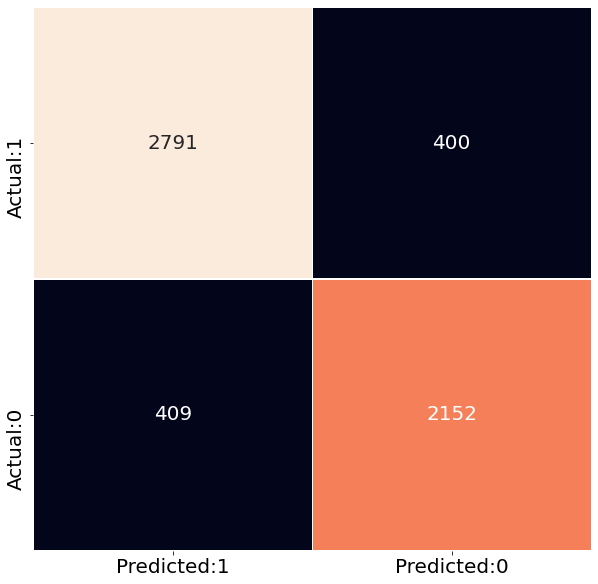

In [84]:
confusion_matrix_plot(logistic_model)

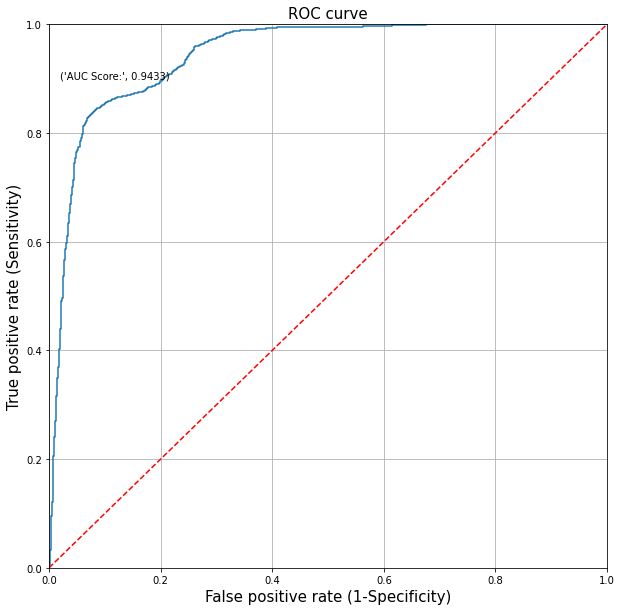

In [85]:
roc_plot(logistic_model)

In [86]:
print(creport(logistic_model))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2561
           1       0.87      0.87      0.87      3191

    accuracy                           0.86      5752
   macro avg       0.86      0.86      0.86      5752
weighted avg       0.86      0.86      0.86      5752



## 7.2 Naive Bayes   <a id='bayes'></a>

In [87]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

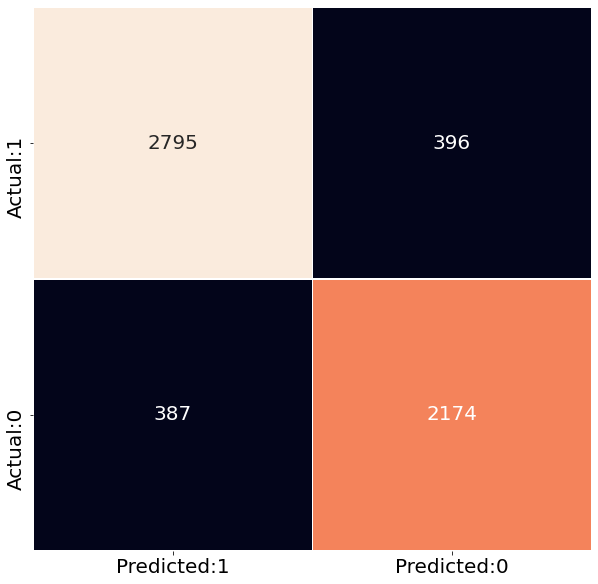

In [88]:
confusion_matrix_plot(gnb)

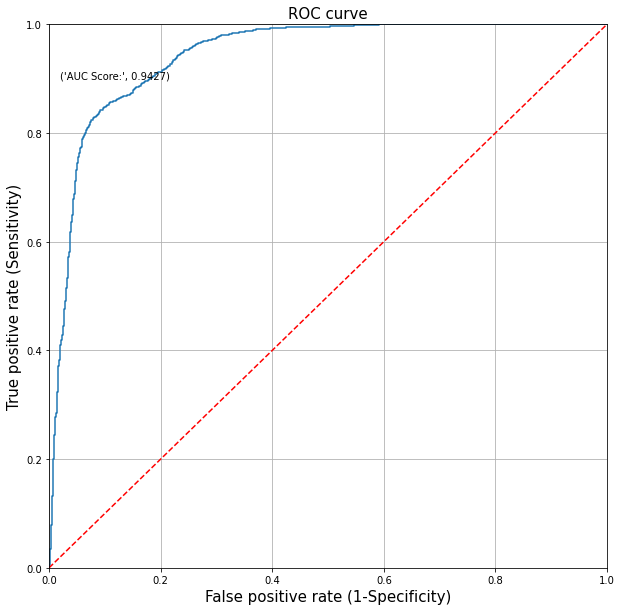

In [89]:
roc_plot(gnb)

In [90]:
print(creport(gnb))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2561
           1       0.88      0.88      0.88      3191

    accuracy                           0.86      5752
   macro avg       0.86      0.86      0.86      5752
weighted avg       0.86      0.86      0.86      5752



## 7.3 K nearest neighbors (KNN)   <a id='knn'></a>

In [91]:
knn = KNeighborsClassifier(n_neighbors= 11)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

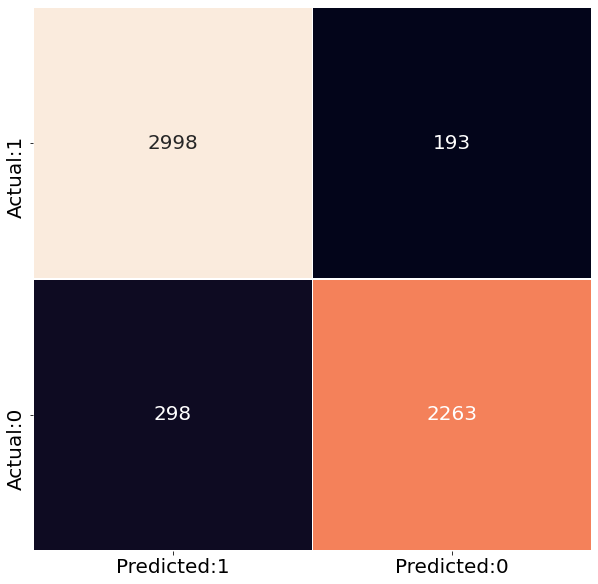

In [92]:
confusion_matrix_plot(knn)

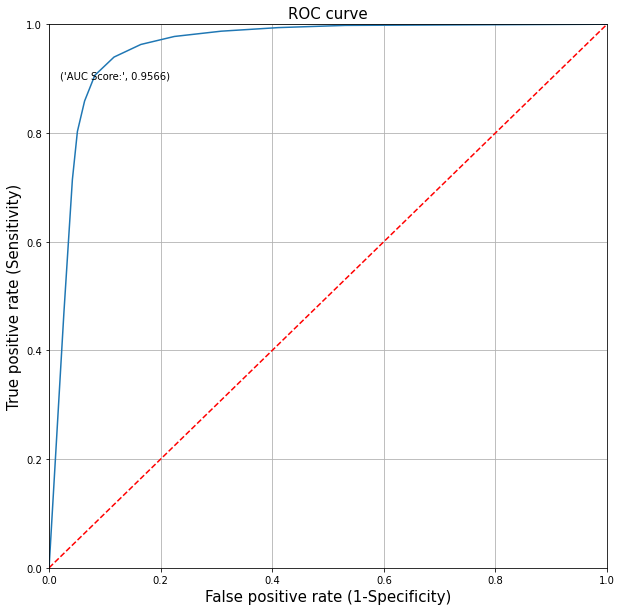

In [93]:
roc_plot(knn)

In [94]:
print(creport(knn))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      2561
           1       0.91      0.94      0.92      3191

    accuracy                           0.91      5752
   macro avg       0.92      0.91      0.91      5752
weighted avg       0.91      0.91      0.91      5752



## 7.4 Random Forest <a id='forest'></a>

In [95]:
rf = RandomForestClassifier(max_depth=4, random_state=0 , criterion= 'entropy' , max_features='sqrt' , min_samples_split= 2 , n_estimators= 300)
rf.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

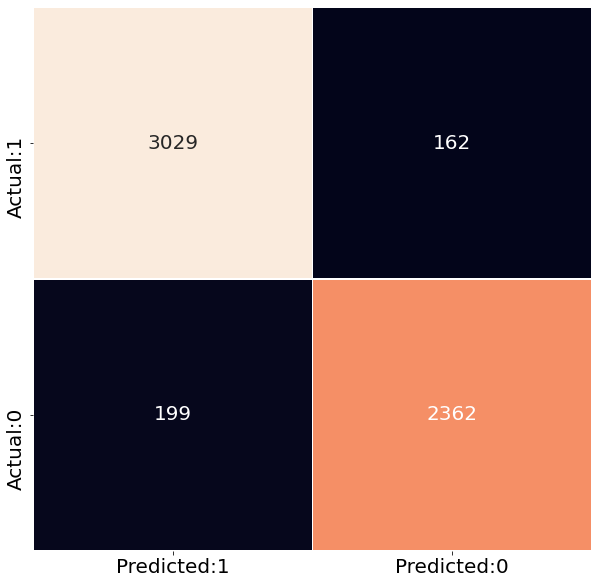

In [96]:
confusion_matrix_plot(rf)

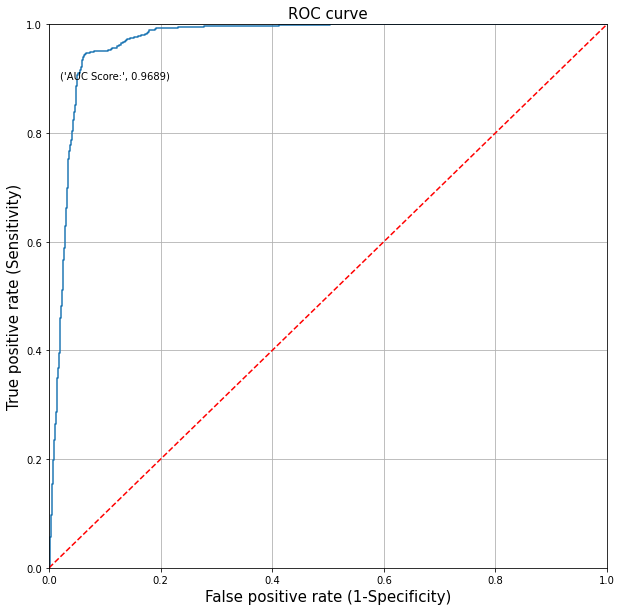

In [97]:
roc_plot(rf)

In [98]:
print(creport(rf))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2561
           1       0.94      0.95      0.94      3191

    accuracy                           0.94      5752
   macro avg       0.94      0.94      0.94      5752
weighted avg       0.94      0.94      0.94      5752



In [99]:
import pydotplus
from IPython.display import Image  
from sklearn.tree import export_graphviz

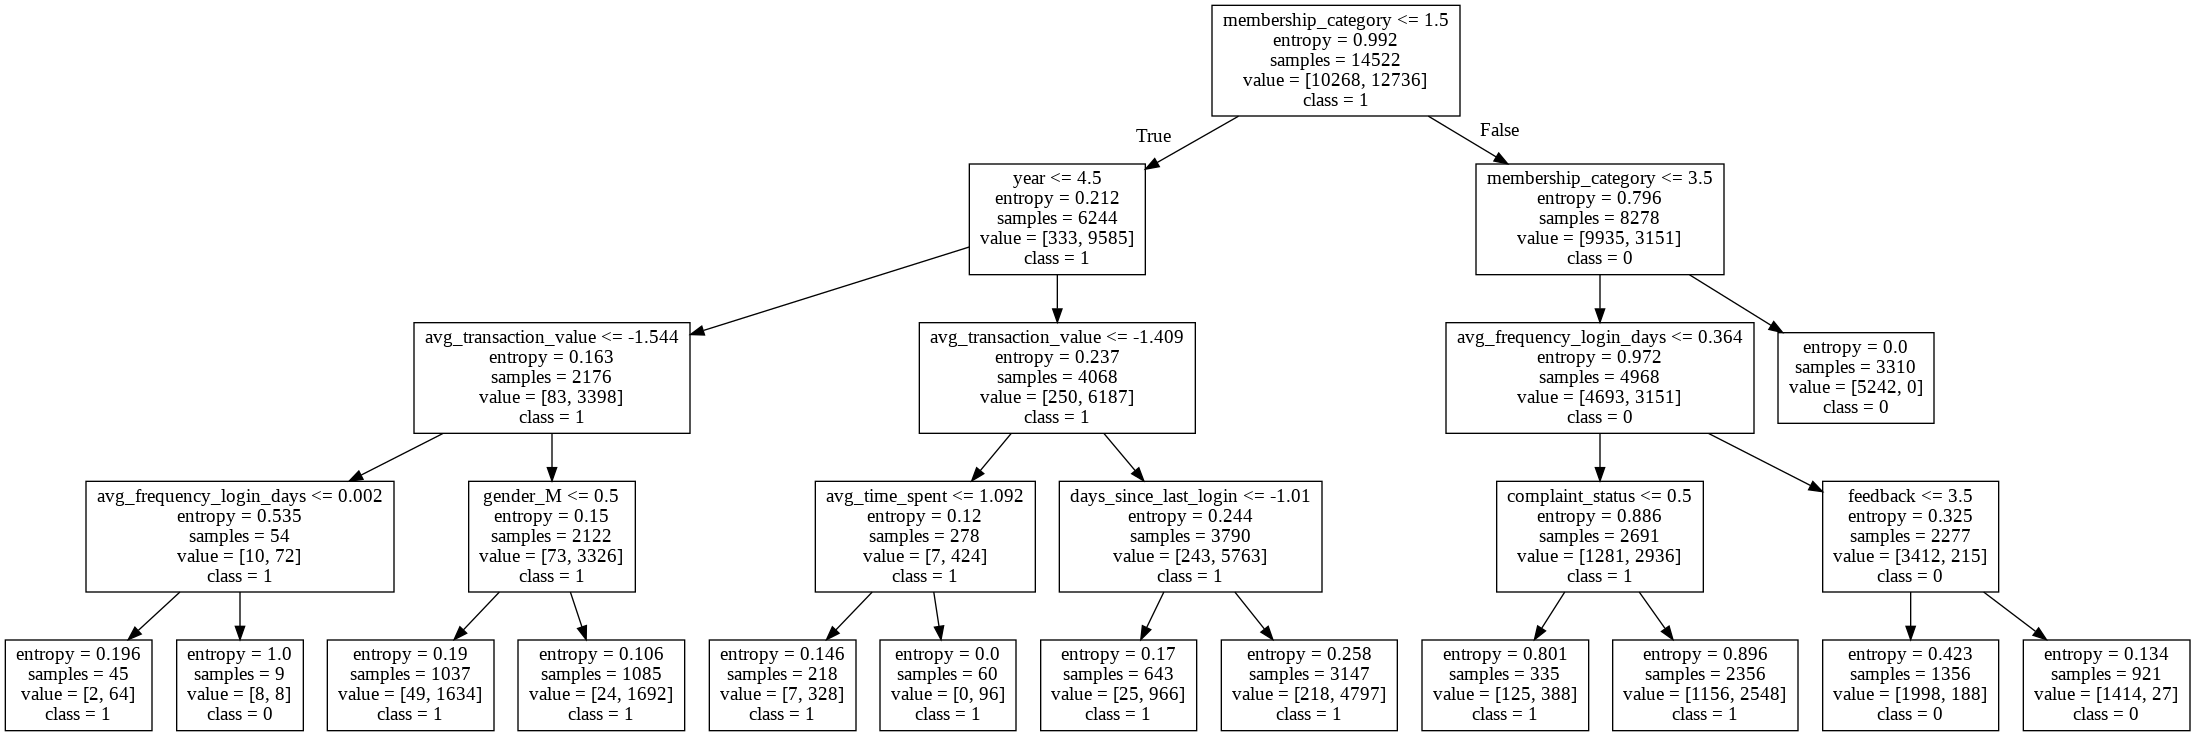

In [100]:
labels = X_train.columns
dot_data = tree.export_graphviz(rf[0], feature_names = labels, class_names = ["0","1"])  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

## 7.5 AdaBoost <a id='adaboost'></a>

In [101]:
ab = AdaBoostClassifier(n_estimators=250, learning_rate = 0.01, random_state=0)
ab.fit(X_train , y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=250, random_state=0)

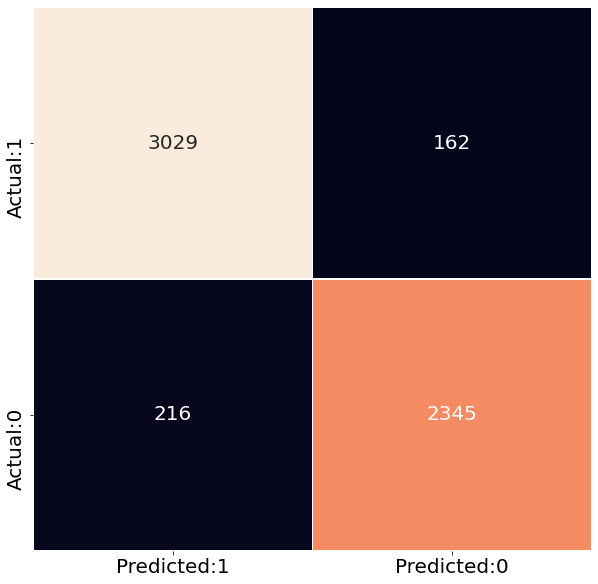

In [102]:
confusion_matrix_plot(ab)

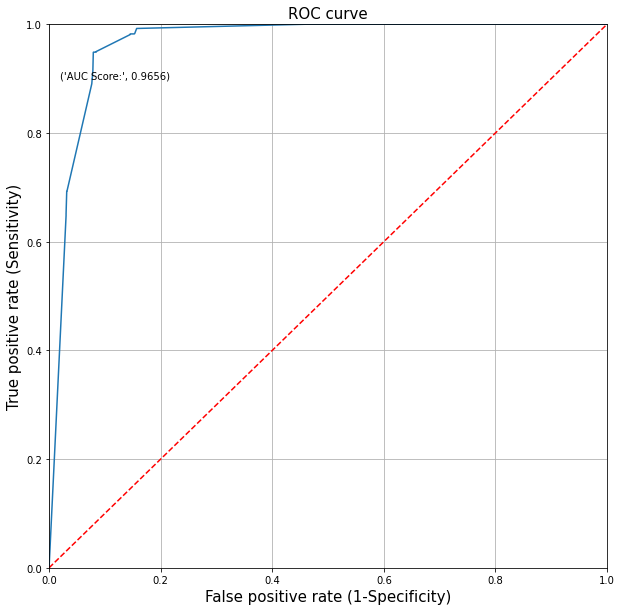

In [103]:
roc_plot(ab)

In [104]:
print(creport(ab))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2561
           1       0.93      0.95      0.94      3191

    accuracy                           0.93      5752
   macro avg       0.93      0.93      0.93      5752
weighted avg       0.93      0.93      0.93      5752



## 7.6 XGBoost  <a id='xgboost'></a>

In [105]:
xgb = XGBClassifier(random_state= 0 , learning_rate= 0.2, n_estimators= 100)
xgb.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

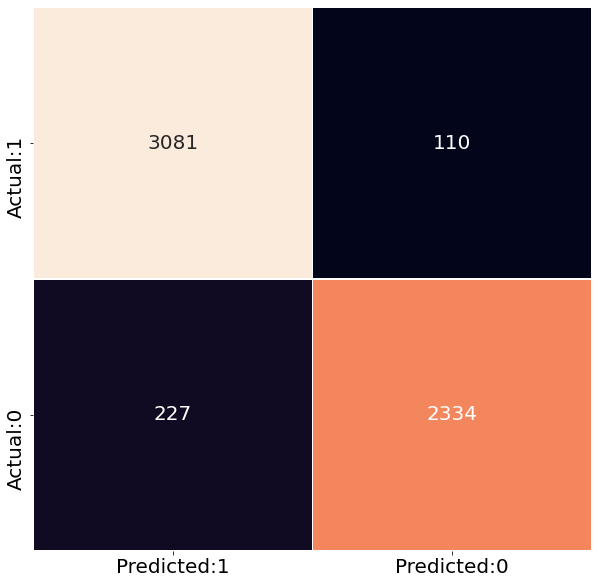

In [106]:
confusion_matrix_plot(xgb)

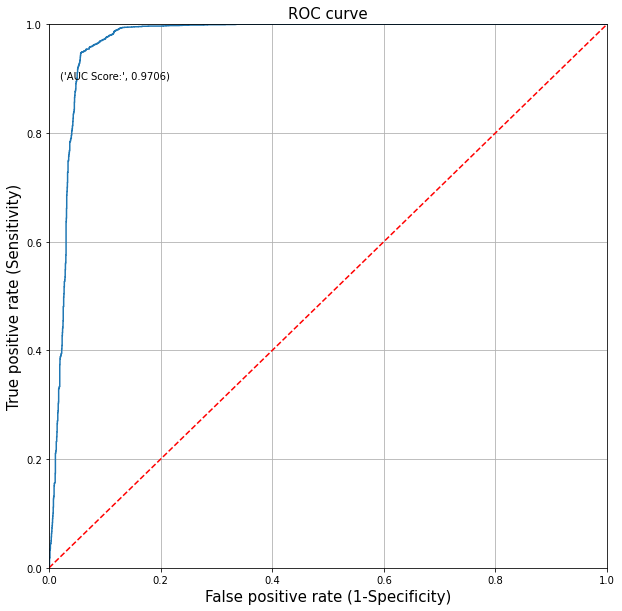

In [107]:
roc_plot(xgb)

In [108]:
print(creport(xgb))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2561
           1       0.93      0.97      0.95      3191

    accuracy                           0.94      5752
   macro avg       0.94      0.94      0.94      5752
weighted avg       0.94      0.94      0.94      5752



# 8 Model Performance <a id='mod_per'></a>

**Comparison of Different Models**

In [109]:
# Training Set Predictions
y_predtr = logistic_model.predict(X_train)
y_pred1tr = gnb.predict(X_train)
y_pred2tr = knn.predict(X_train)
y_pred3tr = rf.predict(X_train)
y_pred4tr = ab.predict(X_train)
y_pred5tr = xgb.predict(X_train)

In [110]:
# Test Set Predictions
y_pred = logistic_model.predict(X_test)
y_pred1 = gnb.predict(X_test)
y_pred2 = knn.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = ab.predict(X_test)
y_pred5 = xgb.predict(X_test)

In [111]:
# Comparison of Different Models wrt Performance Metrics
comp = pd.DataFrame({'Model':['Logistic Regression','Naive Bayes','KNN','Random Forest','AdaBoost','XGBoost'],
                    'Train Accuracy':[accuracy(y_train,y_predtr), accuracy(y_train,y_pred1tr), accuracy(y_train,y_pred2tr), accuracy(y_train,y_pred3tr),
                                      accuracy(y_train,y_pred4tr), accuracy(y_train,y_pred5tr)],
                    'Test Accuracy':[accuracy(y_test,y_pred), accuracy(y_test,y_pred1), accuracy(y_test,y_pred2), accuracy(y_test,y_pred3),
                                      accuracy(y_test,y_pred4), accuracy(y_test,y_pred5)],
                    'Test f1-Score':[f1(y_test,y_pred), f1(y_test,y_pred1), f1(y_test,y_pred2), f1(y_test,y_pred3),
                                      f1(y_test,y_pred4), f1(y_test,y_pred5)]}
                    )

print(comp)

                 Model  Train Accuracy  Test Accuracy  Test f1-Score
0  Logistic Regression        0.857373       0.859353       0.857596
1          Naive Bayes        0.861763       0.863873       0.862268
2                  KNN        0.925796       0.914638       0.913221
3        Random Forest        0.932099       0.937239       0.936384
4             AdaBoost        0.929143       0.934284       0.933341
5              XGBoost        0.948618       0.941412       0.940407


# 9 Model Optimization  <a id='mod_opt'></a>

## 9.1 Block Diagram  <a id='block'></a>

<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="Block Diagram.PNG">
        </td>
    </tr>
</table>

## 9.2 Voting Classifier  <a id='vote'></a>

In [112]:
clf1 = KNeighborsClassifier(n_neighbors= 11)
clf2 = RandomForestClassifier(max_depth=4, random_state=0 , criterion= 'entropy' , max_features='sqrt' , min_samples_split= 2 , n_estimators= 300)
clf3 = AdaBoostClassifier(n_estimators=250, learning_rate = 0.01,random_state=0)
vclf = VotingClassifier(estimators=[('KNN', clf1), ('Random_Forest', clf2), ('AdaBoost' , clf3)],
                                   voting='soft')

## 9.3 Stacking Classifier   <a id='stack'></a>

In [113]:
estimators = [('Voting Classifier' , vclf),
              ('XGBoost', XGBClassifier(random_state= 0 , learning_rate= 0.2 , n_estimators= 100) )]

stackclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state= 0))

In [114]:
stackclf.fit(X_train ,y_train)

StackingClassifier(cv=None,
                   estimators=[('Voting Classifier',
                                VotingClassifier(estimators=[('KNN',
                                                              KNeighborsClassifier(algorithm='auto',
                                                                                   leaf_size=30,
                                                                                   metric='minkowski',
                                                                                   metric_params=None,
                                                                                   n_jobs=None,
                                                                                   n_neighbors=11,
                                                                                   p=2,
                                                                                   weights='uniform')),
                                                           

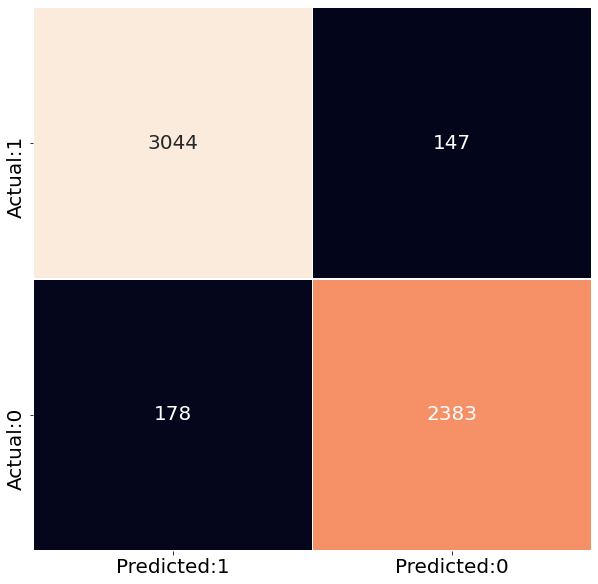

In [115]:
confusion_matrix_plot(stackclf)

In [116]:
y_pred6tr = stackclf.predict(X_train)
y_pred6 = stackclf.predict(X_test)

# 10 Displaying Score Summary   <a id='dis_sco_sum'></a>

In [117]:
comp1 = pd.DataFrame({'Model':['Final Model'],
                      'Train Accuracy':[accuracy(y_train,y_pred6tr)],
                      'Test Accuracy':[accuracy(y_test,y_pred6)],
                      'Test f1-Score':[f1(y_test , y_pred6)]}
                      )
final_comp = pd.concat([comp, comp1], axis = 0)
print(final_comp)

                 Model  Train Accuracy  Test Accuracy  Test f1-Score
0  Logistic Regression        0.857373       0.859353       0.857596
1          Naive Bayes        0.861763       0.863873       0.862268
2                  KNN        0.925796       0.914638       0.913221
3        Random Forest        0.932099       0.937239       0.936384
4             AdaBoost        0.929143       0.934284       0.933341
5              XGBoost        0.948618       0.941412       0.940407
0          Final Model        0.946096       0.943498       0.942742
